In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import bambi as bmb
import arviz as az
import numpy as np
import seaborn as sb
from d3blocks import D3Blocks

In [112]:
df = pd.read_excel('../figures/statistics.xlsx')
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
0,Alexanders geesten,Alexiuslegende,0.000210,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN
1,Alexanders geesten,Anatomie van de mens,0.001598,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN
2,Alexanders geesten,Arturs doet,0.056002,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN
3,Alexanders geesten,Aubri de Borgengoen,0.009408,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN
4,Alexanders geesten,Barlaam en Josaphat,0.003126,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.052042,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert
25756,Merlijn-continuatie,Walewein ende Keye,0.070897,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem
25758,Merlijn-continuatie,Wisselau,0.008882,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN


In [113]:
df.sort_values('hits', ascending=False).iloc[0:50]

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
23124,Van der wive wonderlijcheit (lange versie),Noch meer van wiven,0.312500,Epiek,Epiek,Didactiek,Didactiek,1375.0,1400.0,NaN,NaN
13583,Noch meer van wiven,Van der wive wonderlijcheit (lange versie),0.312500,Epiek,Epiek,Didactiek,Didactiek,1400.0,1375.0,NaN,NaN
3219,Brabantsche yeesten (B7),Brabantsche yeesten (B6),0.213322,Epiek,Epiek,Historiografie,Historiografie,1470.0,1432.0,NaN,NaN
20422,Spiegel historiael (P1-P4),Rijmbijbel,0.207259,Epiek,Epiek,Historiografie,Religie,1312.5,1285.0,Jacob van Maerlant,NaN
11043,Lancelot,Arturs doet,0.191458,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN
11136,Lancelot,Queeste van den Grale,0.187801,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN
20447,Spiegel historiael (P1-P4),Spiegel historiael (P2),0.179261,Epiek,Epiek,Historiografie,Historiografie,1312.5,1337.5,Jacob van Maerlant,Philip Utenbroeke
20379,Spiegel historiael (P1-P4),Historie van Troyen,0.152325,Epiek,Epiek,Historiografie,Ridder,1312.5,1475.0,Jacob van Maerlant,Jacob van Maerlant
3059,Brabantsche yeesten (B6),Brabantsche yeesten (B7),0.146413,Epiek,Epiek,Historiografie,Historiografie,1432.0,1470.0,NaN,NaN
10786,Korte kroniek van Brabant (lange versie),Korte kroniek van Brabant (korte versie 1),0.135478,Epiek,Epiek,Historiografie,Historiografie,1410.0,1404.5,Heraut Beyeren,Jan van Boendale


In [114]:
trg = ['Moriaen', 'Lantsloot van der Haghedochte', 'Karel ende Elegast']
trg_df = df[(df['t1'].isin(trg)) & (df['t2'].isin(trg))]
th = trg_df['hits'].mean()
trg_df.sort_values('hits')

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
10479,Karel ende Elegast,Moriaen,0.029085,Epiek,Epiek,Karel,Arthur,1487.0,1325.0,NaN,NaN
10469,Karel ende Elegast,Lantsloot van der Haghedochte,0.029167,Epiek,Epiek,Karel,Arthur,1487.0,1325.0,NaN,NaN
12865,Moriaen,Karel ende Elegast,0.036099,Epiek,Epiek,Arthur,Karel,1325.0,1487.0,NaN,NaN
11265,Lantsloot van der Haghedochte,Karel ende Elegast,0.040278,Epiek,Epiek,Arthur,Karel,1325.0,1487.0,NaN,NaN
12870,Moriaen,Lantsloot van der Haghedochte,0.088574,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN
11279,Lantsloot van der Haghedochte,Moriaen,0.098847,Epiek,Epiek,Arthur,Arthur,1325.0,1325.0,NaN,NaN


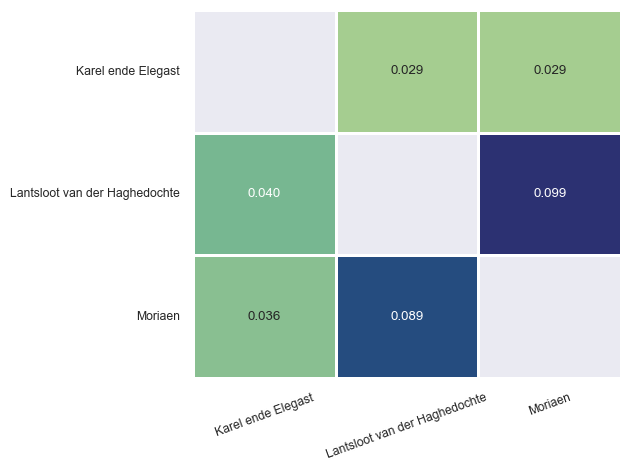

In [117]:
titles = sorted(set(trg_df['t1']))
hits = np.zeros((len(titles), len(titles)))

for _, row in trg_df.iterrows():
    hits[titles.index(row['t1']), titles.index(row['t2'])] = row['hits']

np.fill_diagonal(hits, np.nan)

hits = pd.DataFrame(hits, index=titles, columns=titles)
sb.set(font_scale=.8)
ax = sb.heatmap(hits, annot=True, cmap='crest', cbar=False,
                linewidths=1, linecolor='white', fmt='.3f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/hits_dist.png', transparent=True);

Most central text?

In [81]:
df.groupby('t1')['hits'].mean().sort_values(ascending=False).head(30)

t1
Rijmbijbel                                  0.030083
Spiegel historiael (P1-P4)                  0.029226
Grimbergse oorlog                           0.027381
Historie van Troyen                         0.026845
Luiks Diatessaron                           0.026769
Lancelot                                    0.025729
Brabantsche yeesten (B7)                    0.025607
Limborch                                    0.024557
Rijmkroniek van Woeringen                   0.023421
Alexanders geesten                          0.022849
Roman der Lorreinen                         0.022399
Merlijn-continuatie                         0.022388
Rijmkroniek van Holland                     0.021871
Brabantsche yeesten (B6)                    0.021518
Spiegel historiael (P2)                     0.021047
Der leken spieghel                          0.020267
Arturs doet                                 0.020236
Brabantsche yeesten (B1-5)                  0.019808
Walewein                                   

In [118]:
df[df['t1'] == 'Rijmkroniek van Woeringen'].sort_values('hits', ascending=False).head(10)

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2
16658,Rijmkroniek van Woeringen,Brabantsche yeesten (B1-5),0.106314,Epiek,Epiek,Historiografie,Historiografie,1440.0,1470.0,Jan van Heelu,Jan van Boendale
16694,Rijmkroniek van Woeringen,Grimbergse oorlog,0.097726,Epiek,Epiek,Historiografie,Historiografie,1440.0,1325.0,Jan van Heelu,NaN
16659,Rijmkroniek van Woeringen,Brabantsche yeesten (B6),0.084553,Epiek,Epiek,Historiografie,Historiografie,1440.0,1432.0,Jan van Heelu,NaN
16743,Rijmkroniek van Woeringen,Rijmkroniek van Holland,0.079833,Epiek,Epiek,Historiografie,Historiografie,1440.0,1375.0,Jan van Heelu,Melis Stoke
16745,Rijmkroniek van Woeringen,Roman der Lorreinen,0.070746,Epiek,Epiek,Historiografie,Karel,1440.0,1350.0,Jan van Heelu,NaN
16776,Rijmkroniek van Woeringen,Van den derden Eduwaert,0.067676,Epiek,Epiek,Historiografie,Historiografie,1440.0,1445.0,Jan van Heelu,Jan van Boendale
16660,Rijmkroniek van Woeringen,Brabantsche yeesten (B7),0.062865,Epiek,Epiek,Historiografie,Historiografie,1440.0,1470.0,Jan van Heelu,NaN
16769,Rijmkroniek van Woeringen,Spiegel historiael (P5),0.062364,Epiek,Epiek,Historiografie,Historiografie,1440.0,1325.0,Jan van Heelu,Lodewijk van Velthem
16640,Rijmkroniek van Woeringen,Alexanders geesten,0.061966,Epiek,Epiek,Historiografie,Ridder,1440.0,1400.0,Jan van Heelu,Jacob van Maerlant
16713,Rijmkroniek van Woeringen,Limborch,0.060347,Epiek,Epiek,Historiografie,Ridder,1440.0,1350.0,Jan van Heelu,Heinriic


In [119]:
df['subgenre'] = df['subgenre1'] == df['subgenre2']
df['author'] = df['author1'] == df['author2']
df['date'] = df['date1'] - df['date2']
df

,t1,t2,hits,genre1,genre2,subgenre1,subgenre2,date1,date2,author1,author2,subgenre,author,date
0,Alexanders geesten,Alexiuslegende,0.000210,Epiek,Epiek,Ridder,Heiligenleven,1400.0,1295.5,Jacob van Maerlant,NaN,False,False,104.5
1,Alexanders geesten,Anatomie van de mens,0.001598,Epiek,Epiek,Ridder,Didactiek,1400.0,1375.0,Jacob van Maerlant,NaN,False,False,25.0
2,Alexanders geesten,Arturs doet,0.056002,Epiek,Epiek,Ridder,Arthur,1400.0,1325.0,Jacob van Maerlant,NaN,False,False,75.0
3,Alexanders geesten,Aubri de Borgengoen,0.009408,Epiek,Epiek,Ridder,Karel,1400.0,1350.0,Jacob van Maerlant,NaN,False,False,50.0
4,Alexanders geesten,Barlaam en Josaphat,0.003126,Epiek,Epiek,Ridder,Ridder,1400.0,1387.5,Jacob van Maerlant,NaN,True,False,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,Merlijn-continuatie,Walewein,0.052042,Epiek,Epiek,Arthur,Arthur,1425.0,1350.0,Lodewijk van Velthem,Penninc en Pieter Vostaert,True,False,75.0
25756,Merlijn-continuatie,Walewein ende Keye,0.070897,Epiek,Epiek,Arthur,Arthur,1425.0,1325.0,Lodewijk van Velthem,NaN,True,False,100.0
25757,Merlijn-continuatie,Willem van Oringen,0.004553,Epiek,Epiek,Arthur,Karel,1425.0,1325.0,Lodewijk van Velthem,Clays van Haerlem,False,False,100.0
25758,Merlijn-continuatie,Wisselau,0.008882,Epiek,Epiek,Arthur,Karel,1425.0,1295.5,Lodewijk van Velthem,NaN,False,False,129.5


In [120]:
df['author'].value_counts()

False    25674
True        86
Name: author, dtype: int64

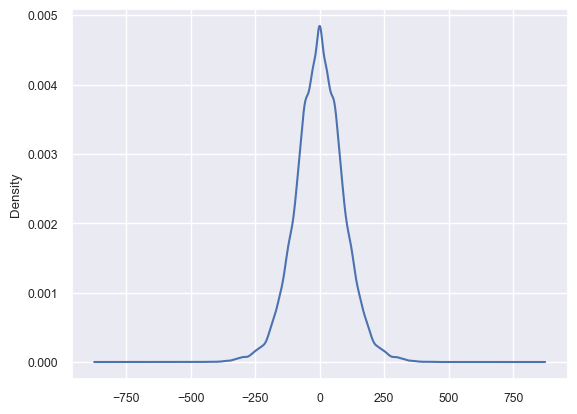

In [121]:
df['date'].plot.kde();

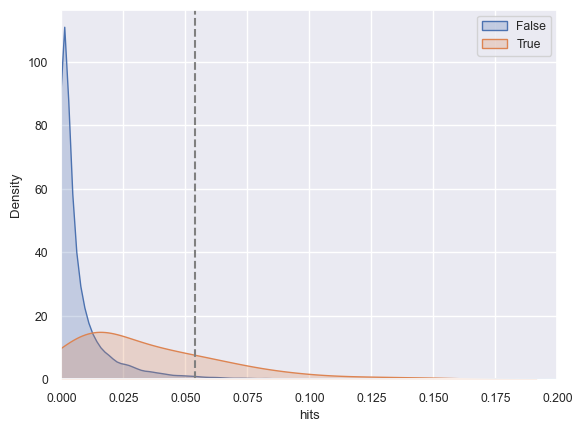

In [122]:
import seaborn as sns
fig, ax = plt.subplots()
for gr, group in df.groupby('author'):
    sns.kdeplot(group['hits'], ax=ax, label=gr, shade=True)
plt.axvline(th, c='grey', ls='--')
plt.xlim(0, .2)
plt.legend();

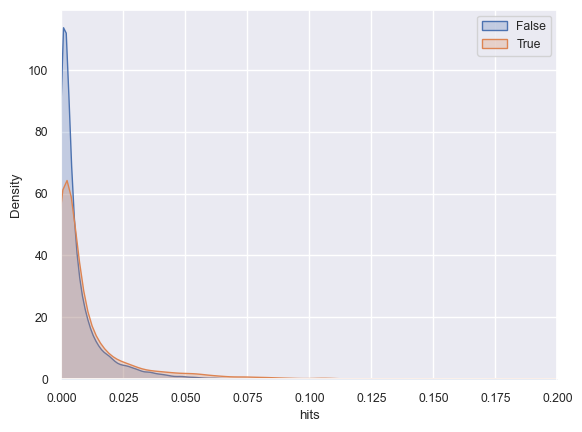

In [123]:
import seaborn as sns
fig, ax = plt.subplots()
for gr, group in df.groupby('subgenre'):
    sns.kdeplot(group['hits'], ax=ax, label=gr, shade=True)
plt.xlim(0, .2)
plt.legend();

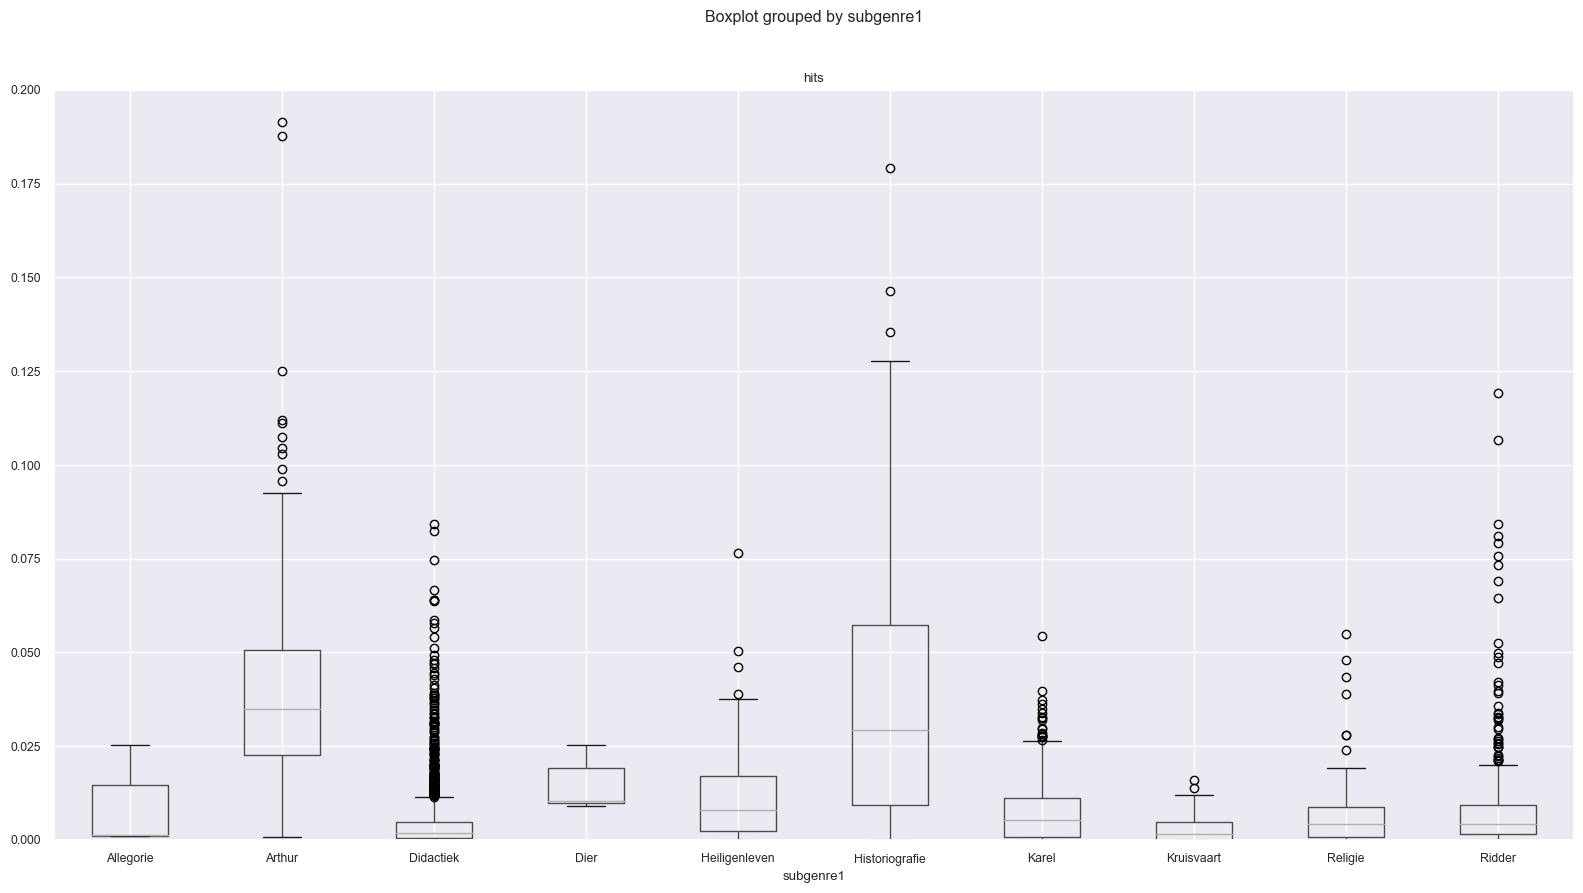

In [124]:
df_match = df[df['subgenre'] == True]
df_match.boxplot('hits', 'subgenre1', figsize=(19, 10))
plt.ylim(0, .2);

In [125]:
df['subgenre'] = df['subgenre'].astype('category')
df['author'] = df['author'].astype('category')

In [126]:
df['subgenre'].value_counts()

False    21920
True      3840
Name: subgenre, dtype: int64

In [127]:
print(len(df))
df = df[~df.isna()]
print(len(df))

25760
25760


In [128]:
intergenre = df.groupby(['subgenre1', 'subgenre2'])['hits'].mean().reset_index().rename_axis(None, axis=1)
intergenre

,subgenre1,subgenre2,hits
0,Allegorie,Allegorie,0.008111
1,Allegorie,Arthur,0.012036
2,Allegorie,Didactiek,0.004659
3,Allegorie,Dier,0.008598
4,Allegorie,Heiligenleven,0.007584
...,...,...,...
95,Ridder,Historiografie,0.012003
96,Ridder,Karel,0.006908
97,Ridder,Kruisvaart,0.004932
98,Ridder,Religie,0.006130


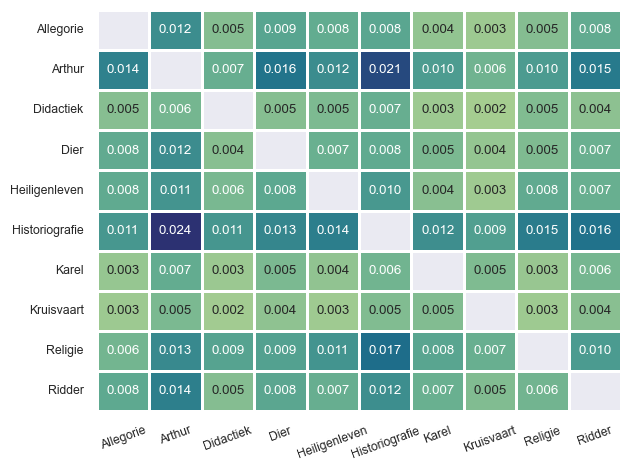

In [129]:
genres = sorted(set(intergenre['subgenre1']))
hits = np.zeros((len(genres), len(genres)))

for _, row in intergenre.iterrows():
    hits[genres.index(row['subgenre1']), genres.index(row['subgenre2'])] = row['hits']

np.fill_diagonal(hits, np.nan)

hits = pd.DataFrame(hits, index=genres, columns=genres)
sb.set(font_scale=.8)
ax = sb.heatmap(hits, annot=True, cmap='crest', cbar=False,
                linewidths=1, linecolor='white', fmt='.3f')
ax.tick_params(left=False, bottom=False)
for l in plt.gca().lines:
    l.set_alpha(0.3)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(f'../figures/genre_dist.png', transparent=True);

In [130]:
intergenre = df.groupby(['subgenre1', 'subgenre2'])['hits'].mean().reset_index().rename_axis(None, axis=1)
intergenre.columns = ('source', 'target', 'weight')

intergenre['target'] += '(trg)'
intergenre['source'] += '(src)'
intergenre

d3 = D3Blocks()
d3.sankey(intergenre, showfig=True, overwrite=True)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> File not found: [file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Open browser: file:////var/folders/kd/w0jjczk911x4pdd7pf2hx6g40000gn/T/d3blocks/sankey.html


## Statistical model

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
[d3blocks] >INFO> finding looplift candidates


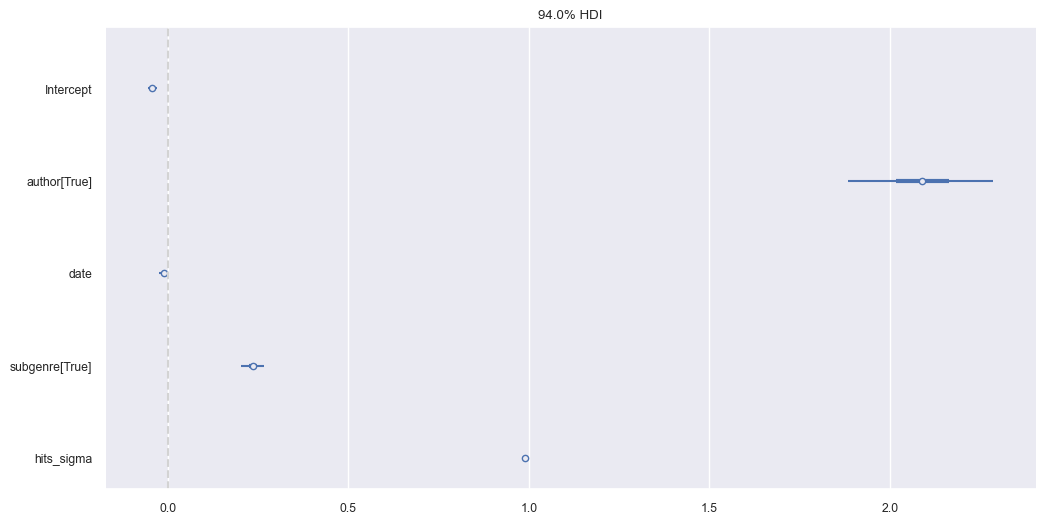

In [131]:
df['date'] = scale(df['date'])
df['hits'] = scale(df['hits'])
model = bmb.Model('hits ~ author + date + subgenre', df)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

What if we limit this to author pairs, where at least one of them is known (according to the Cd-rom)?

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
[d3blocks] >INFO> finding looplift candidates


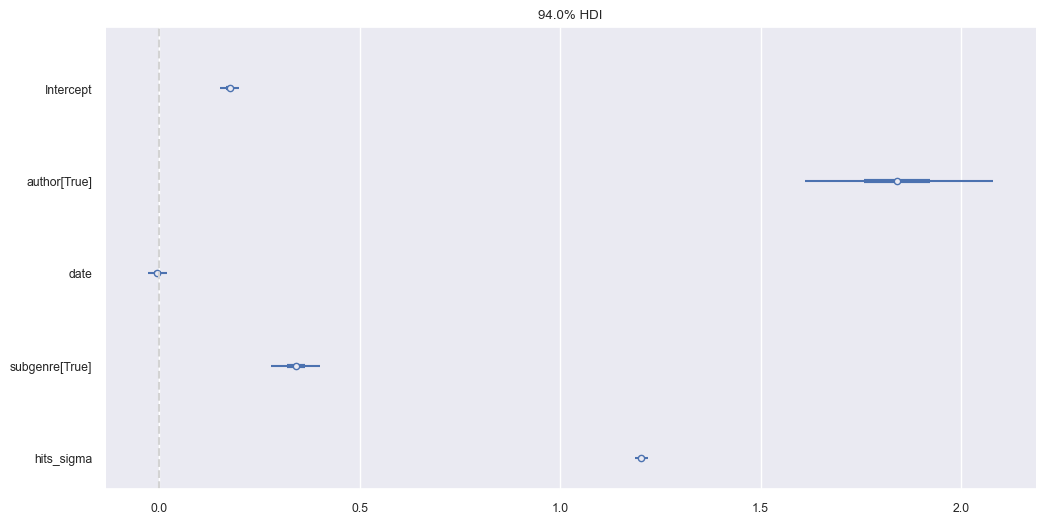

In [136]:
auth_df = df[(~df['author1'].isna()) | (~df['author2'].isna())]
model = bmb.Model('hits ~ author + date + subgenre', auth_df)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

What if we further limit this to the Main Three?

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
[d3blocks] >INFO> finding looplift candidates


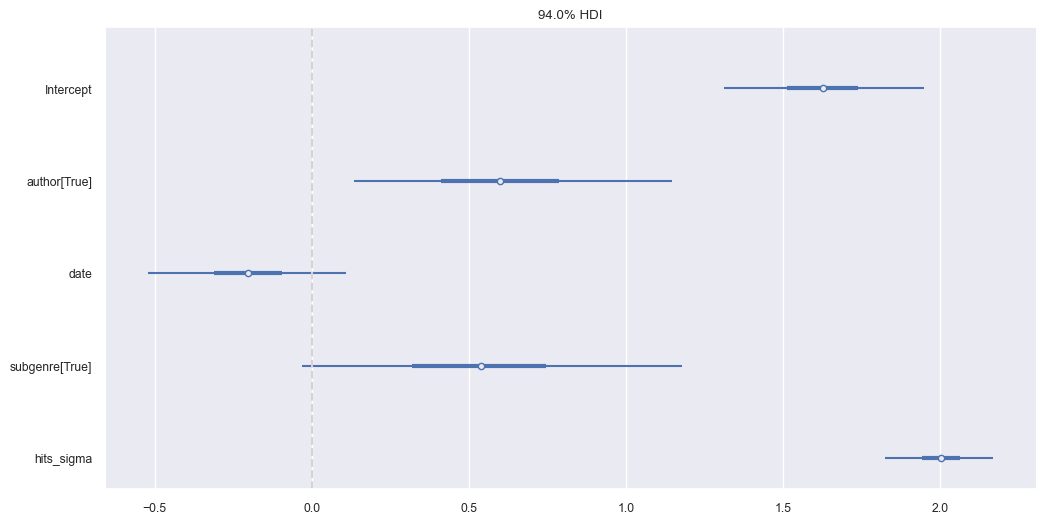

In [141]:
AUTHORS = {'Jacob van Maerlant', 'Lodewijk van Velthem', 'Jan van Boendale', 'Philip Utenbroeke'}
#auth_df = auth_df[(auth_df['author1'].isin(AUTHORS)) | (auth_df['author2'].isin(AUTHORS))]
auth_df = auth_df[(auth_df['author1'].isin(AUTHORS)) & (auth_df['author2'].isin(AUTHORS))]
model = bmb.Model('hits ~ author + date + subgenre', auth_df)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');

Auto-assigning NUTS sampler...
[d3blocks] >INFO> Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
[d3blocks] >INFO> Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
[d3blocks] >INFO> Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, author, date, subgenre1, hits_sigma]
[d3blocks] >INFO> NUTS: [Intercept, author, date, subgenre1, hits_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 109 seconds.
[d3blocks] >INFO> Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 109 seconds.
[d3blocks] >INFO> finding looplift candidates


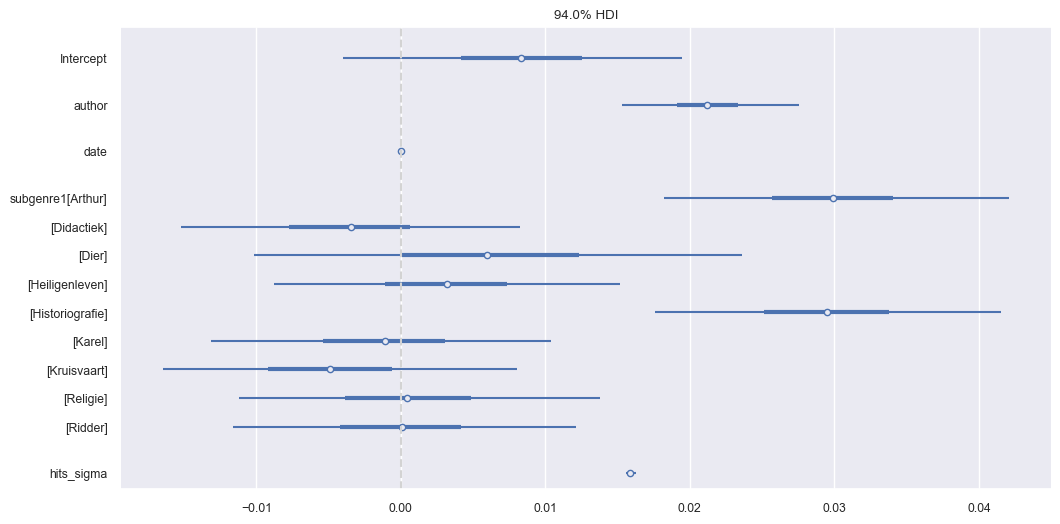

In [132]:
model = bmb.Model('hits ~ author + date + subgenre1', df_match)
fit = model.fit(draws=1000, chains=4)
az.summary(fit)
az.plot_forest(fit, combined=True, figsize=(12, 6))
plt.axvline(0, c='lightgrey', ls='--');